<a href="https://colab.research.google.com/github/Hilfum/KMeans-Clustering/blob/main/Tugas_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

df = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106744 entries, 0 to 106743
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             106744 non-null  object 
 1   AverageTemperature             100388 non-null  float64
 2   AverageTemperatureUncertainty  101126 non-null  float64
 3   Country                        106743 non-null  object 
dtypes: float64(2), object(2)
memory usage: 3.3+ MB


In [10]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,100388.000000,101126.000000
mean,18.298324,0.955156
std,10.307714,1.111528
min,-28.736000,0.055000
25%,12.250750,0.317000
50%,22.143000,0.553000
75%,26.032000,1.140000
max,37.471000,13.691000


In [11]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [12]:
x = df.drop(['dt','Country'], axis=1)

In [13]:
x.head()

,AverageTemperature,AverageTemperatureUncertainty
0,4.384,2.294
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [34]:
X = x.iloc[199:350]

In [35]:
X.head()

,AverageTemperature,AverageTemperatureUncertainty
199,12.566,2.798
200,16.539,5.901
201,15.035,9.908
202,13.197,6.986
203,4.524,5.654


In [36]:
from sklearn.cluster import KMeans

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

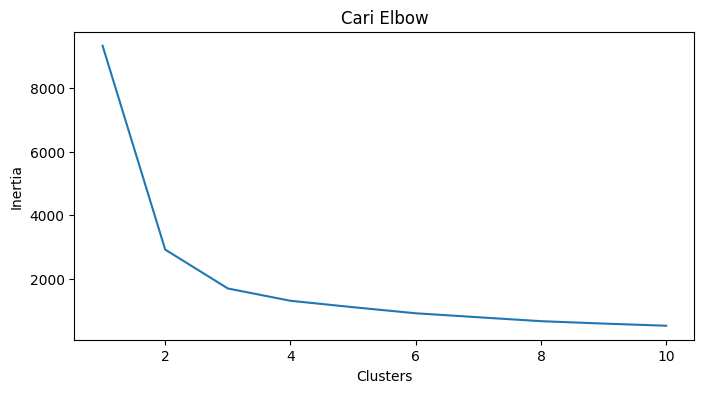

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [38]:
# membuat objek KMeans
km3 = KMeans(n_clusters=3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
# menambahkan kolom label pada dataset
X['Labels'] = km3.labels_

<ipython-input-39-6bef3ab6742a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Labels'] = km3.labels_


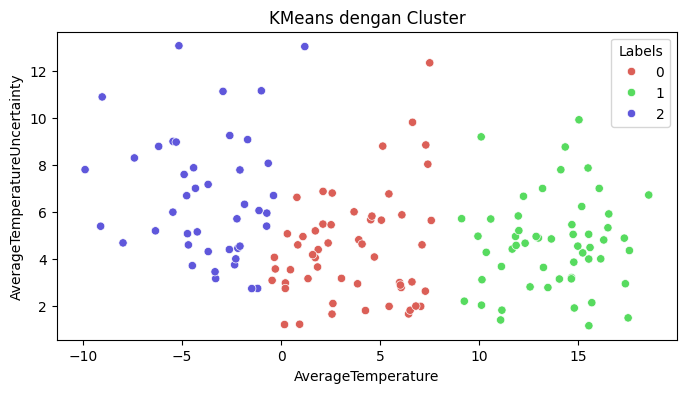

In [40]:
# membuat plot KMeans dengan klaster

plt.figure(figsize=(8,4))
sns.scatterplot(x=X['AverageTemperature'], y=X['AverageTemperatureUncertainty'], hue=X['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans dengan Cluster')
plt.show()